<img src="img/JurassicPark.png">

Take a look at the image above. What are the dominant colours? Now, what if we want to create a program that can automatically find them?

**Image segmentation is the process of partitioning a digital image into multiple distinct regions containing each pixel(sets of pixels, also known as superpixels) with similar attributes.**

**The goal of Image segmentation is to change the representation of an image into something that is more meaningful and easier to analyze.**

## __K-Means Clustering__
So what exactly is k-means?

K-means is a clustering algorithm.

The goal is to partition n data points into k clusters. Each of the n data points will be assigned to a cluster with the nearest mean. The mean of each cluster is called its “centroid” or “center”.

Overall, applying k-means yields k separate clusters of the original n data points. Data points inside a particular cluster are considered to be “more similar” to each other than data points that belong to other clusters.

**In our case, we will be clustering the pixel intensities of a RGB image**. Given a MxN size image, we thus have MxN pixels, each consisting of three components: Red, Green, and Blue respectively.

We will treat these MxN pixels as our data points and cluster them using k-means.

Pixels that belong to a given cluster will be more similar in color than pixels belonging to a separate cluster.

**One caveat of k-means is that we need to specify the number of clusters we want to generate ahead of time**. There are algorithms that automatically select the optimal value of k.

In [ ]:
#!pip install utils
#!pip install opencv-python

In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

In [15]:
#image = 'img/JurassicPark.png'
image = 'img/Joker.jpeg'
clusters = 3

In [16]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(3815, 2525, 3)

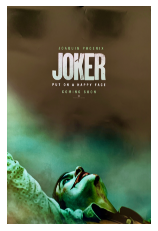

In [17]:
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [18]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3)) # rows x columns to flatten, 3 because we have 3 color planes
image.shape

(9632875, 3)

In [19]:
clt = KMeans(n_clusters=clusters)
clt.fit(image)

KMeans(n_clusters=3)

In [21]:
clt.labels_

array([0, 0, 0, ..., 0, 0, 0])

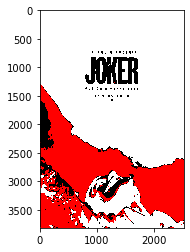

In [24]:
from matplotlib import colors
cmap = colors.ListedColormap(['white', 'black', 'red'])
#plt.imshow(clt.labels_.reshape(469, 643), cmap=cmap);
plt.imshow(clt.labels_.reshape(3815, 2525), cmap=cmap);

In [7]:
# import the necessary packages
import numpy as np
import cv2


def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

In [8]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    
    # return the bar chart
    return bar

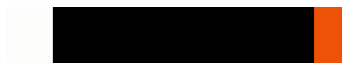

In [9]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

Now you can check it with other pictures!